In [1]:
 import pandas as pd
import numpy as np

import networkx as nx
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import random

import json 


import warnings
warnings.filterwarnings("ignore")

import matplotlib
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

In [5]:
import json
import os

# Load configuration
with open("../../config/config_notebooks_TNBC.json", "r") as config_file:
    config = json.load(config_file)

In [6]:
config["retrained_benchmark_folder2"]

'../../results/TNBC/benchmark/uni_full_models/'

In [13]:
markers_uni = pd.read_csv(os.path.join(config["retrained_benchmark_folder2"], 
                                       "invasive_cancer_clustering", 
                                       "kmeans", 
                                       "uni", 
                                       "marker_genes_5_clusters.csv"), 
                                       index_col=0)

markers_uni_full_koleo_4096_prototypes = pd.read_csv(os.path.join(config["retrained_benchmark_folder2"], 
                                                                  "invasive_cancer_clustering", 
                                                                  "kmeans", 
                                                                  "uni_full_koleo_4096_prototypes", 
                                                                  "marker_genes_6_clusters.csv"), 
                                                                  index_col=0)

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

def pathway_plot_one_cluster(df, 
                             node_list, 
                             cluster, 
                             markers, 
                             col="avg_log2FC", 
                             default_value=0, 
                             color=True, 
                             k=0.8,
                             vmax=1.4):
    df_nodes = markers.copy()
    df_nodes = df_nodes[df_nodes['cluster'] == cluster]
    df_nodes = df_nodes[df_nodes['gene'].isin(node_list)][[col, 'gene']]

    # add row in df_nodes if node in node_list is not in it. Put pval to 1.
    for node in node_list:
        if node not in df_nodes['gene'].tolist():
            df_nodes.loc[node] = [default_value, node]
            #df_nodes = df_nodes.append({'gene': node, 'pval': 1}, ignore_index=True)

    #df_nodes['log10_pval_adj'] = -np.log10(df_nodes['p_val_adj'])
    df_nodes.set_index('gene', inplace=True)



    # Initialize the graph
    G = nx.Graph()

    # Add nodes and edges from the Excel data
    for node in node_list:
        G.add_node(node, color=df_nodes.loc[node, col])
        
    for index, row in df.iterrows():
        G.add_edge(row['#node1'], row['node2'])
        
    
    # Draw the graph
    
    # Fix the seed for the layout
    seed = 42
    pos = nx.spring_layout(G, seed=seed, scale=2, k=k)

    if color:
        plt.figure(figsize=(10, 8))

        # Get node colors based on p-value, with a default value if 'p_value' is missing
        node_colors = [G.nodes[node]['color'] for node in G.nodes]

        # Create a color map
        # colors = ['#FFFFFF','#69C4E0',  '#242B7A',  '#CF48DB', '#ffe800']
        # cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)
        colors = ['#FFFFFF',  '#69C4E0']
        cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)
        
        cmap = plt.cm.Blues
        # Normalize the color map for the color bar
        norm = plt.Normalize(vmin=0, vmax=vmax)
        # normalized_colors = [norm(color) for color in node_colors]
        # Set edge color to red


        # Draw the graph
        # nx.draw(G, pos, node_color=node_colors, cmap=cmap, with_labels=False, node_size=500, edge_color='gray', width=0.5, vmin=0, vmax=50)
        g = nx.draw(G, pos, node_color=node_colors, cmap=cmap, 
                with_labels=False, node_size=500, edge_color='gray', width=0.5, vmin=0, vmax=vmax)
        # Add labels above the nodes
        for node, (x, y) in pos.items():
            plt.text(x, y + 0.1, s=str(node), horizontalalignment='center', fontsize=10, weight='bold', color='black')

        # Add a color bar
        # sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array(node_colors)
        cbar = plt.colorbar(sm)
        cbar.set_label(col, fontsize=12)
        
        ax = plt.gca()
        for node, (x, y) in pos.items():
            circle = plt.Circle((x, y), radius=0.05, edgecolor='black', facecolor='none', linewidth=5)
            ax.add_patch(circle)
            
        nodes = nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=cmap, node_size=500, vmin=0, vmax=vmax)
        nodes.set_edgecolor('black')
        
    else:
        # Draw the graph
        plt.figure(figsize=(8, 8))

        nx.draw(G, pos, with_labels=False, node_size=500, edge_color='gray', width=0.5)
        # Add labels above the nodes
        for node, (x, y) in pos.items():
            plt.text(x, y + 0.1, s=str(node), horizontalalignment='center', fontsize=10, weight='bold', color='black')
            
        nodes = nx.draw_networkx_nodes(G, pos, node_size=500, vmin=0, vmax=vmax, node_color='white')
        nodes.set_edgecolor('black')
    # Set edge color to red
    # Show the plot
    plt.tight_layout()

## RNA splicing

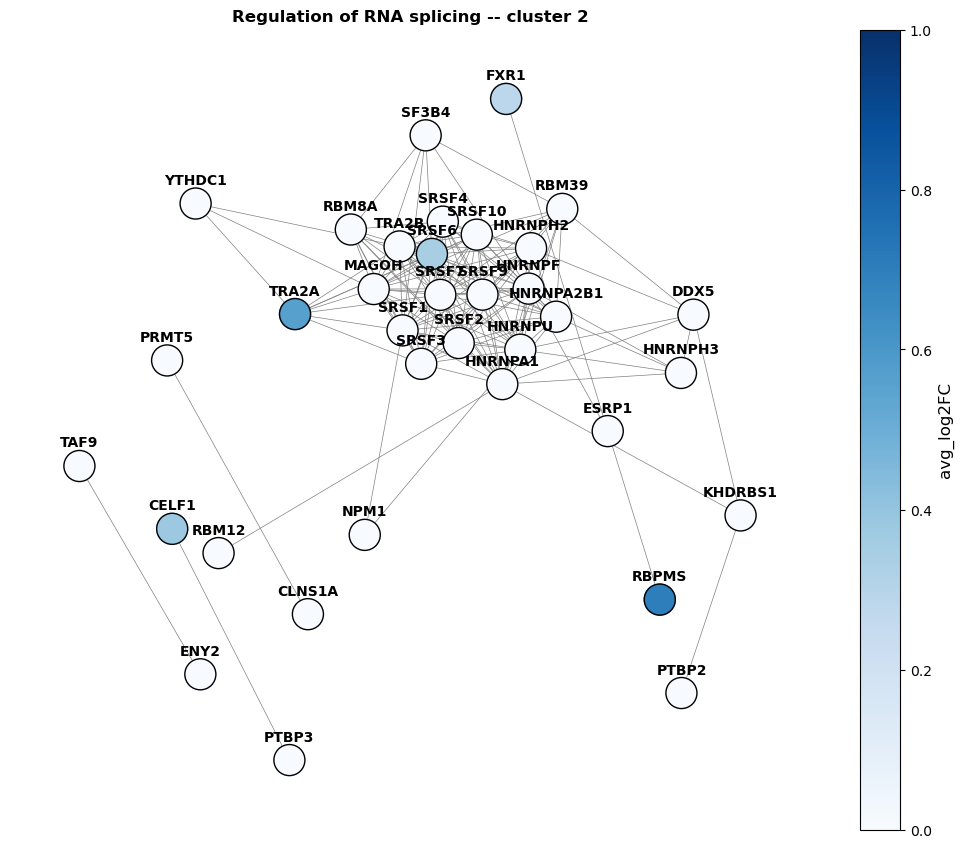

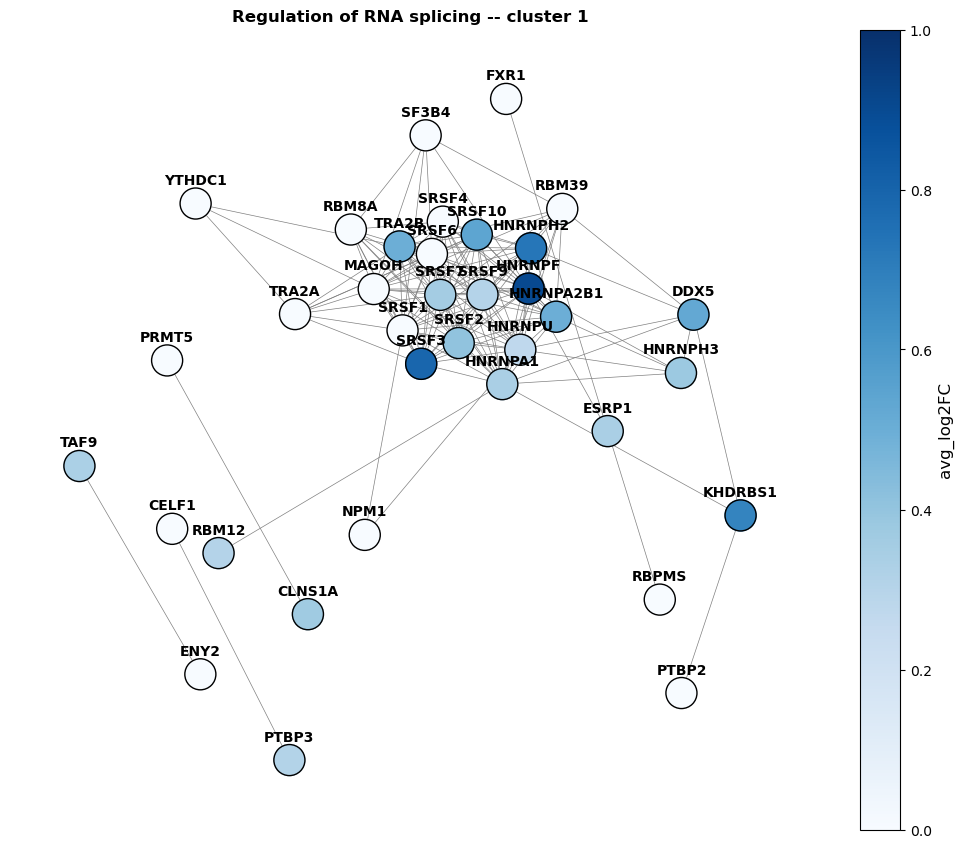

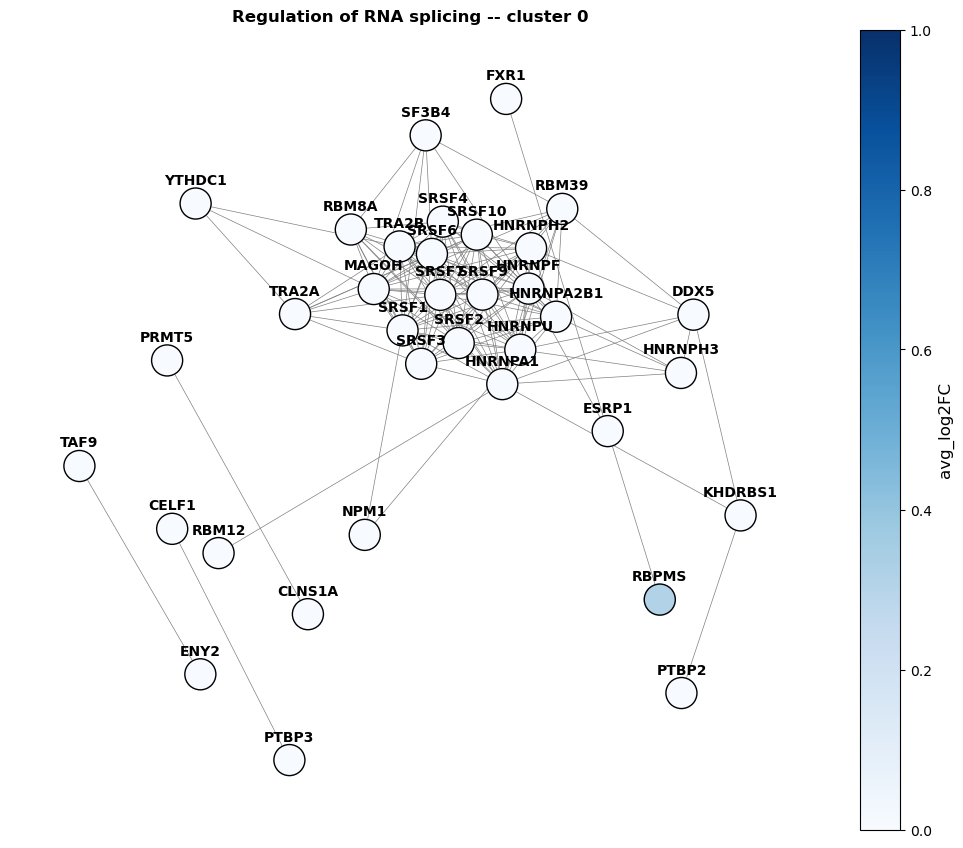

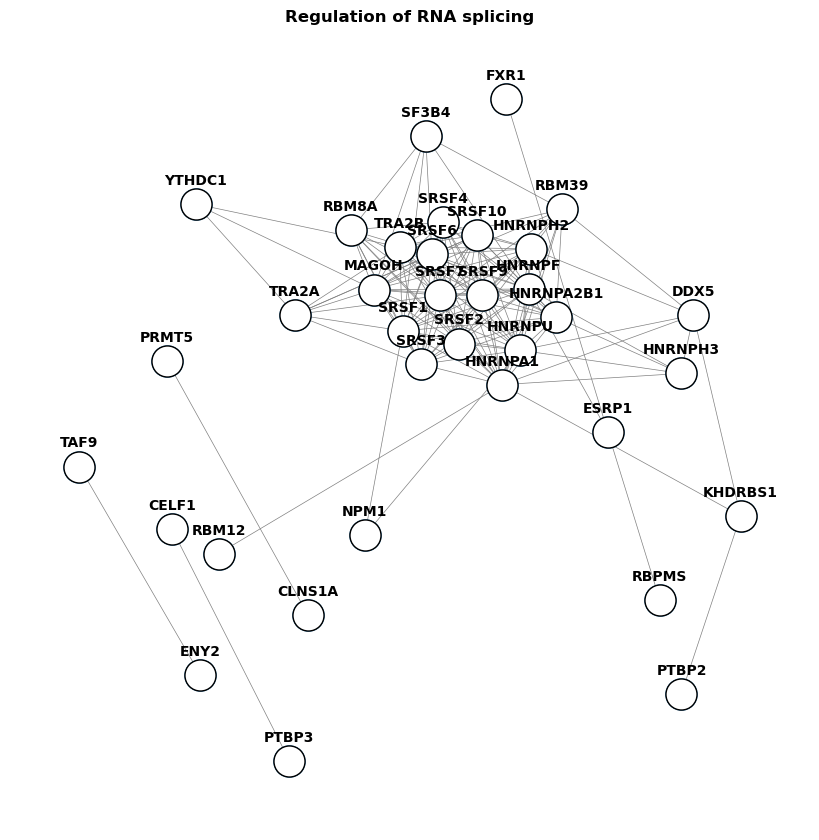

In [37]:
df = pd.read_csv('../../data/pathways/regulation_of_rna_splicing.tsv', sep='\t')
node_list = list(set(df['#node1'].tolist() + df['node2'].tolist()))

pathway_plot_one_cluster(df, node_list, 2, markers_uni_full_koleo_4096_prototypes, vmax=1)
plt.title('Regulation of RNA splicing -- cluster 2', weight='bold')
plt.savefig(os.path.join(config["figures_folder"], "Figure5", 'rna_splicing_cluster2_uni_full_koleo_4096_prototypes.pdf'), bbox_inches='tight')

pathway_plot_one_cluster(df, node_list, 1, markers_uni_full_koleo_4096_prototypes, vmax=1)
plt.title('Regulation of RNA splicing -- cluster 1', weight='bold')
plt.savefig(os.path.join(config["figures_folder"], "Figure5", 'rna_splicing_cluster1_uni_full_koleo_4096_prototypes.pdf'), bbox_inches='tight')

pathway_plot_one_cluster(df, node_list, 0, markers_uni_full_koleo_4096_prototypes, vmax=1)
plt.title('Regulation of RNA splicing -- cluster 0', weight='bold')
plt.savefig(os.path.join(config["figures_folder"], "Figure5", 'rna_splicing_cluster0_uni_full_koleo_4096_prototypes.pdf'), bbox_inches='tight')

pathway_plot_one_cluster(df, node_list, 0, markers_uni_full_koleo_4096_prototypes, color=False)
plt.title('Regulation of RNA splicing', weight='bold')
plt.savefig(os.path.join(config["figures_folder"], "Figure5", 'Regulation_of_RNA_splicing_pathway.pdf'), bbox_inches='tight')


In [32]:
markers_uni_full_koleo_4096_prototypes[(markers_uni_full_koleo_4096_prototypes["cluster"] == 2) & (markers_uni_full_koleo_4096_prototypes['p_val_adj'] < 0.05) & (markers_uni_full_koleo_4096_prototypes['avg_log2FC'] > 0)]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
MT-ND3,3.374865e-39,0.422997,0.998,0.996,4.941814e-35,2,MT-ND3
MT-ND4,4.364604e-38,0.283133,1.000,0.999,6.391089e-34,2,MT-ND4
MT-ATP61,1.238773e-34,0.263716,0.997,0.997,1.813935e-30,2,MT-ATP6
MT-CYB,8.516771e-27,0.497224,0.994,0.993,1.247111e-22,2,MT-CYB
CRIP2,8.071947e-26,0.436049,0.825,0.769,1.181975e-21,2,CRIP2
...,...,...,...,...,...,...,...
MYO1C,3.316310e-06,0.291578,0.773,0.760,4.856072e-02,2,MYO1C
BYSL,3.359536e-06,0.691979,0.489,0.495,4.919369e-02,2,BYSL
DYNC1LI1,3.371549e-06,0.395865,0.355,0.318,4.936959e-02,2,DYNC1LI1
PLCD11,3.379672e-06,0.750301,0.298,0.205,4.948853e-02,2,PLCD1


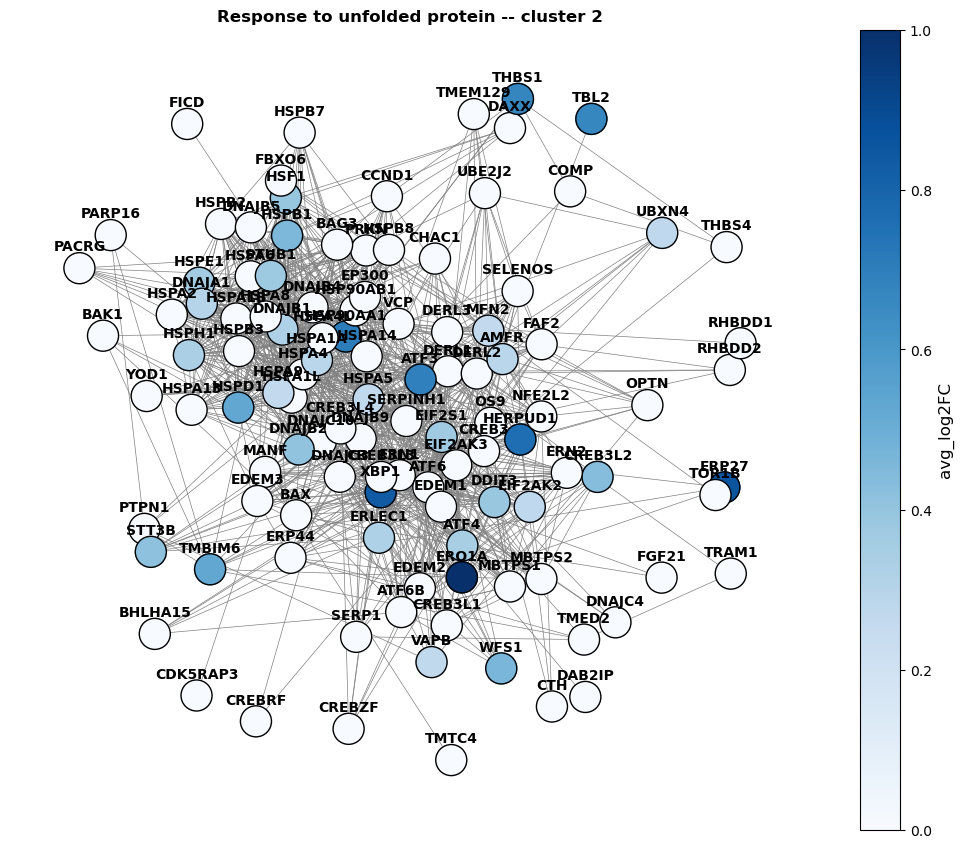

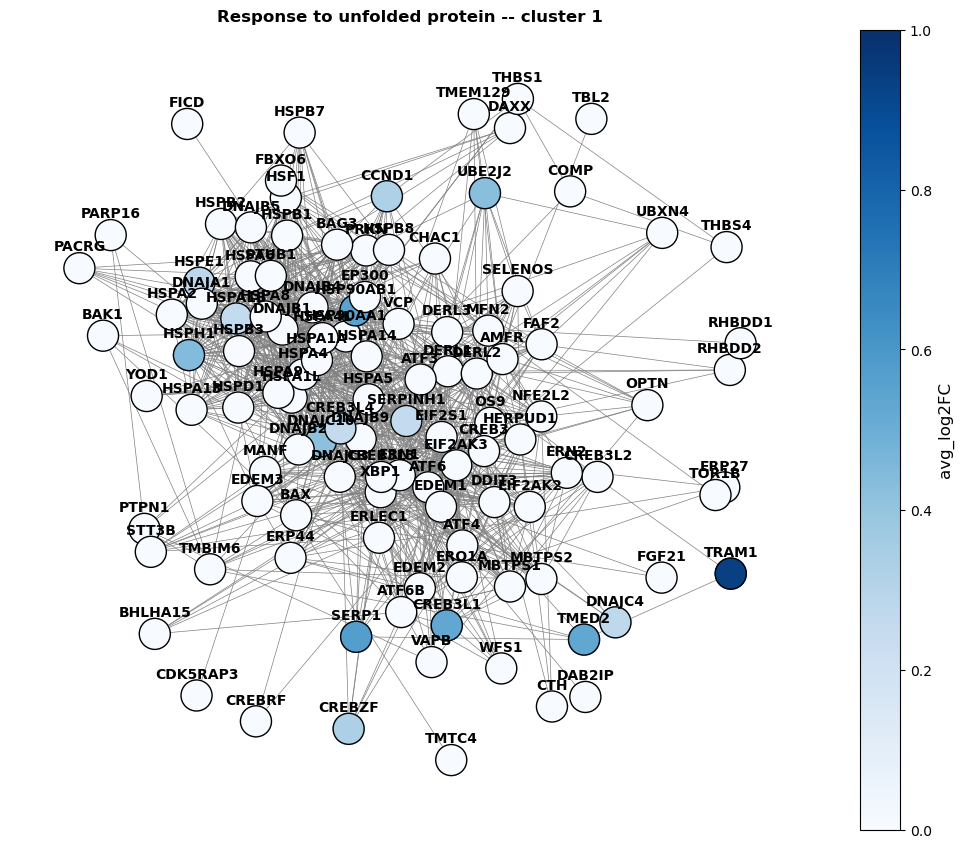

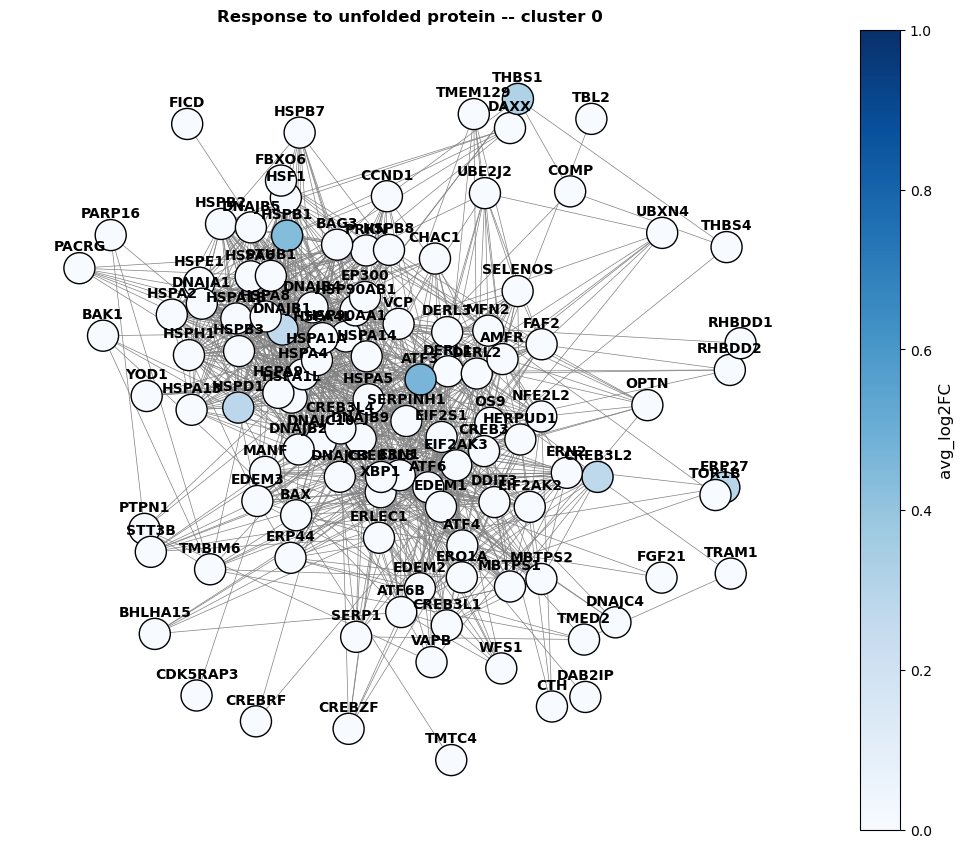

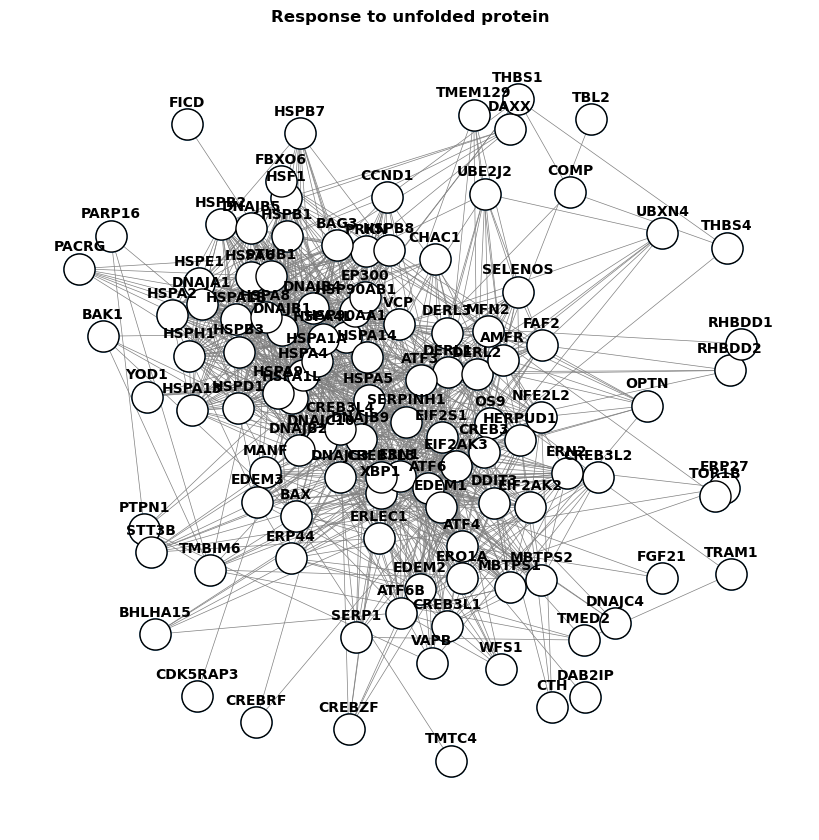

In [42]:
df = pd.read_csv('../../data/pathways/response_to_unfolded_protein.tsv', sep='\t')
node_list = list(set(df['#node1'].tolist() + df['node2'].tolist()))

pathway_plot_one_cluster(df, node_list, 2, markers_uni_full_koleo_4096_prototypes, vmax=1, k=1)
plt.title('Response to unfolded protein -- cluster 2', weight='bold')
plt.savefig(os.path.join(config["figures_folder"], "Figure5", 'response_to_unfolded_protein_cluster2_uni_full_koleo_4096_prototypes.pdf'), bbox_inches='tight')

pathway_plot_one_cluster(df, node_list, 1, markers_uni_full_koleo_4096_prototypes, vmax=1, k=1)
plt.title('Response to unfolded protein -- cluster 1', weight='bold')
plt.savefig(os.path.join(config["figures_folder"], "Figure5", 'response_to_unfolded_protein_cluster1_uni_full_koleo_4096_prototypes.pdf'), bbox_inches='tight')

pathway_plot_one_cluster(df, node_list, 0, markers_uni_full_koleo_4096_prototypes, vmax=1, k=1)
plt.title('Response to unfolded protein -- cluster 0', weight='bold')
plt.savefig(os.path.join(config["figures_folder"], "Figure5", 'response_to_unfolded_protein_cluster0_uni_full_koleo_4096_prototypes.pdf'), bbox_inches='tight')

pathway_plot_one_cluster(df, node_list, 0, markers_uni_full_koleo_4096_prototypes, color=False, k=1)
plt.title('Response to unfolded protein', weight='bold')
plt.savefig(os.path.join(config["figures_folder"], "Figure5", 'response_to_unfolded_protein_pathway.pdf'), bbox_inches='tight')
